In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

sys.path.insert(1, "../")

In [2]:
import utils.us_map
import utils.anomaly as anomaly
import utils.scores as scores
states = utils.us_map.main("../data/cb_2018_us_state_500k")

In [3]:
paths = ['../data/act/tabn226.60_2013_2017.xlsx',
         '../data/act/tabn226.60_2014_2018.xlsx',
         '../data/act/tabn226.60_2015_2019.xlsx',
         '../data/act/tabn226.60_2016_2020.xlsx',
         '../data/act/tabn226.60_2017_2021.xlsx',
         '../data/act/tabn226.60_2018_2022.xlsx',
         '../data/act/tabn226.60_2018_2023.xlsx']

In [4]:
objs = [scores.ACTScores(path) for path in paths]
objs[0].df = objs[0].df.query("year==2013")
objs[1].df = objs[1].df.query("year==2014")

act_scores = scores.Scores()
for obj in objs:
    act_scores = act_scores.merge(obj)
act_scores.df.head()

,location,year,percent,section,mean,test
0,United States,2013,51.731715,composite,20.9,ACT
1,Alabama,2013,78.000000,composite,20.4,ACT
2,Alaska,2013,37.000000,composite,21.1,ACT
3,Arizona,2013,50.000000,composite,19.6,ACT
4,Arkansas,2013,90.000000,composite,20.2,ACT


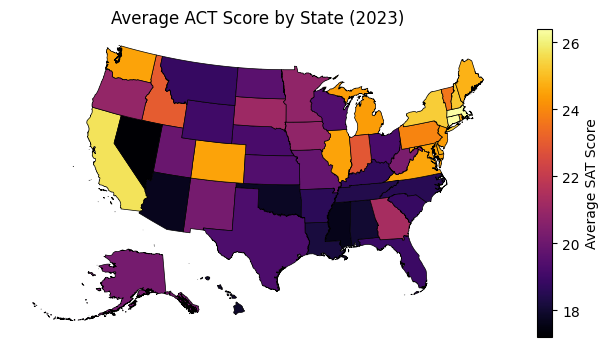

In [5]:
demonstration_locals = ["Nebraska",
                        "Massachusetts", "Florida", "United States"]

(states.merge(act_scores.get_section("composite").get_year(2023).df,
              left_on="NAME",
              right_on="location")
 .plot(column="mean",
       legend=True,
       cmap="inferno",
       edgecolor="black",
       figsize=(8, 8),
       lw=0.5,
       legend_kwds={"label": "Average SAT Score",
                    "shrink": 0.5}))

plt.axis("off")
plt.title("Average ACT Score by State (2023)")
plt.show()

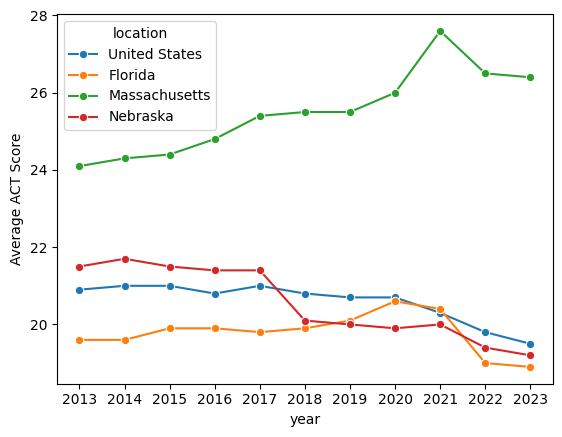

In [6]:
act_scores_df = act_scores.get_section(
    "composite").get_states(demonstration_locals).df

sns.lineplot(data=act_scores_df,
             x="year",
             y="mean",
             hue="location",
             marker="o")

plt.ylabel("Average ACT Score")
plt.xticks(range(act_scores_df["year"].min(), act_scores_df["year"].max()+1))
plt.show()

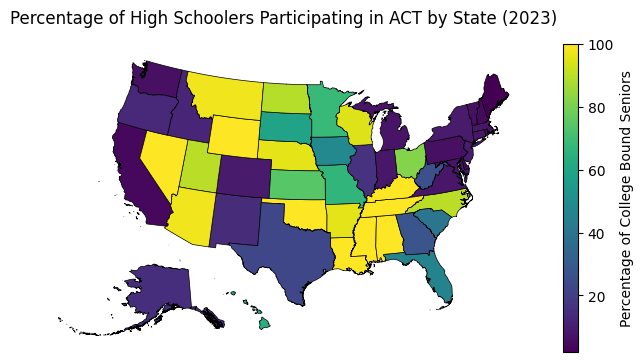

In [7]:
(states.merge(act_scores.get_section("composite").get_year(2023).df,
              left_on="NAME",
              right_on="location")
 .plot(column="percent",
       legend=True,
       edgecolor="black",
       figsize=(8, 8),
       lw=0.5,
       legend_kwds={"label": "Percentage of College Bound Seniors", "shrink": 0.5}))

plt.axis("off")
plt.title("Percentage of High Schoolers Participating in ACT by State (2023)")
plt.show()

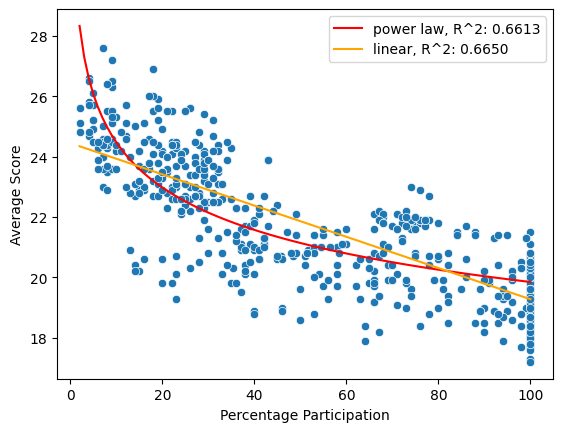

In [8]:
act_scores_df = act_scores.get_section("composite").df

anomaly.anomaly(act_scores_df, separate_years=False)

act_corrected_scores = anomaly.anomaly(
    act_scores_df, separate_years=True, suppress=True)
plaw_scores = act_corrected_scores.assign(
    anom_c=act_corrected_scores["mean"]-act_corrected_scores["plaw_pred"])

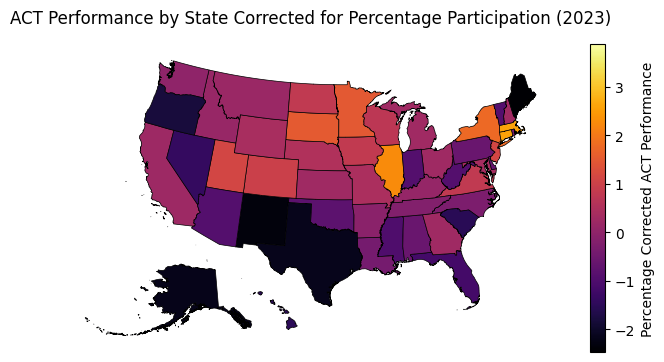

In [9]:
(states.merge(plaw_scores.query("year==2023"),
              left_on="NAME",
              right_on="location")
 .plot(column="anom_c",
       legend=True,
       cmap="inferno",
       edgecolor="black",
       figsize=(8, 8),
       lw=0.5,
       legend_kwds={"label": "Percentage Corrected ACT Performance",
                    "shrink": 0.5}))

plt.axis("off")
plt.title("ACT Performance by State Corrected for Percentage Participation (2023)")
plt.show()

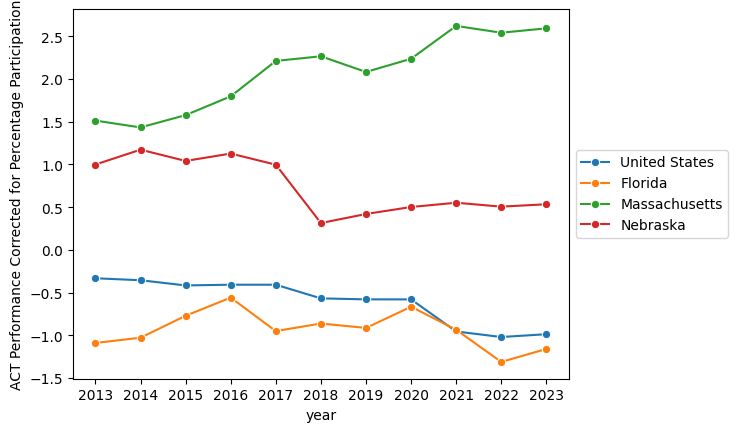

In [10]:
sns.lineplot(data=plaw_scores.query("location in @demonstration_locals"),
             x="year",
             y="anom_c",
             hue="location",
             marker="o")

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.ylabel("ACT Performance Corrected for Percentage Participation")
plt.xticks(range(act_scores_df["year"].min(), act_scores_df["year"].max()+1))
plt.show()

In [11]:
rankings = plaw_scores.pivot_table(index="location", columns="year", values="anom_c").sort_values(
    2023, ascending=False).reset_index()
rankings.columns.name = "2023 Rankings"
rankings.index = rankings.index + 1
rankings.round(1)

2023 Rankings,location,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,District of Columbia,-1.3,-0.4,-0.9,0.3,1.3,1.0,1.2,1.0,3.0,4.6,3.9
2,Massachusetts,1.5,1.4,1.6,1.8,2.2,2.3,2.1,2.2,2.6,2.5,2.6
3,Connecticut,1.7,1.8,1.9,2.0,2.2,2.5,2.2,2.3,2.8,2.3,2.6
4,Illinois,0.4,0.4,0.5,0.8,1.2,2.1,2.2,2.4,2.6,2.2,2.3
5,New York,1.1,0.8,0.9,1.0,1.2,1.5,1.2,1.4,1.9,1.6,1.8
6,South Dakota,1.3,1.2,1.2,1.3,1.3,1.5,1.4,1.5,1.3,1.7,1.5
7,Minnesota,2.3,2.2,2.0,1.1,1.5,1.5,1.7,1.7,1.4,1.5,1.5
8,Utah,0.5,0.5,-0.0,0.2,0.3,0.6,0.7,0.8,1.2,0.9,1.1
9,New Jersey,0.5,0.4,0.5,0.4,1.2,1.0,1.2,1.3,1.4,1.3,1.1
10,Colorado,0.2,0.3,0.5,0.6,0.8,1.2,1.0,0.8,0.6,0.4,1.0


# Appedix

,location,year,percent,section,mean,test,lin_pred,plaw_pred
0,United States,2013,51.731715,composite,20.9,ACT,21.558710,21.232126
1,Alabama,2013,78.000000,composite,20.4,ACT,20.683361,20.610784
2,Alaska,2013,37.000000,composite,21.1,ACT,22.049621,21.753109
3,Arizona,2013,50.000000,composite,19.6,ACT,21.616417,21.284478
4,Arkansas,2013,90.000000,composite,20.2,ACT,20.283479,20.398556
...,...,...,...,...,...,...,...,...
99,Virginia,2023,8.000000,composite,24.6,ACT,23.716262,23.806714
100,Washington,2023,6.000000,composite,24.5,ACT,23.840851,24.486780
101,West Virginia,2023,26.000000,composite,20.3,ACT,22.594961,21.212074
102,Wisconsin,2023,95.000000,composite,19.4,ACT,18.296643,18.684723


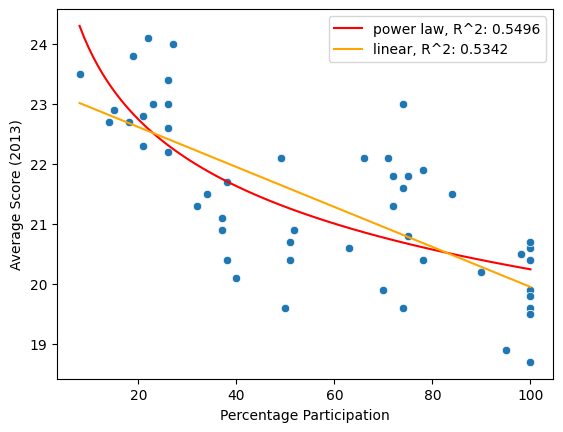

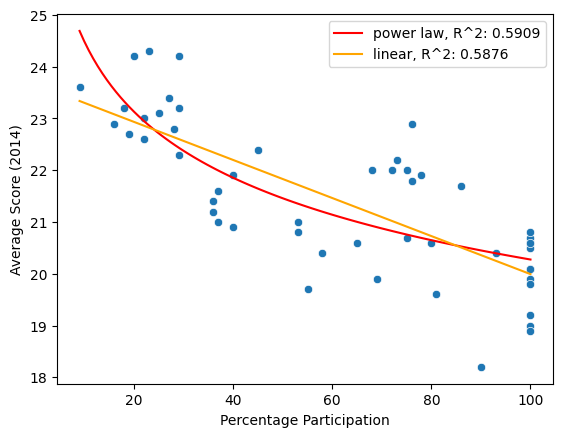

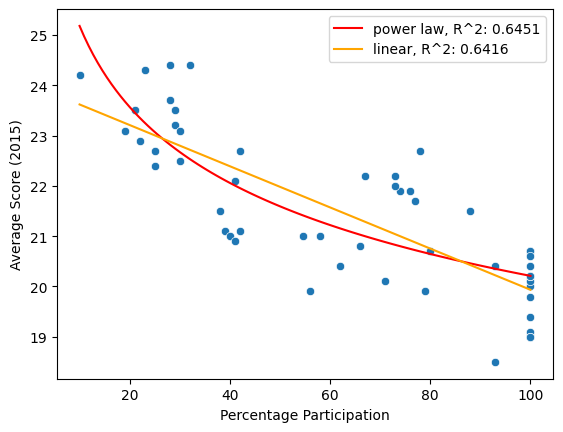

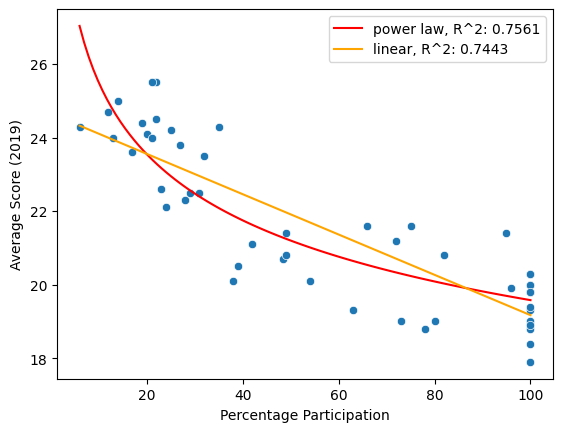

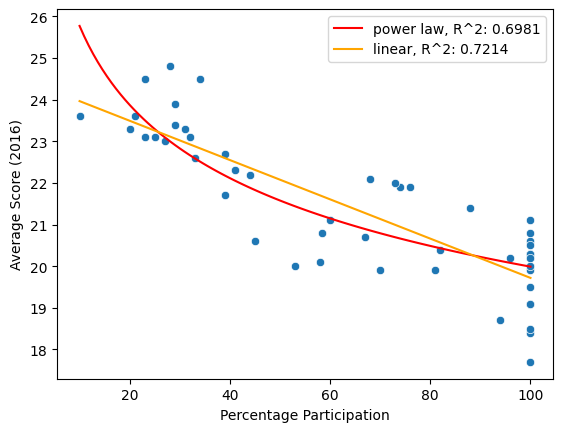

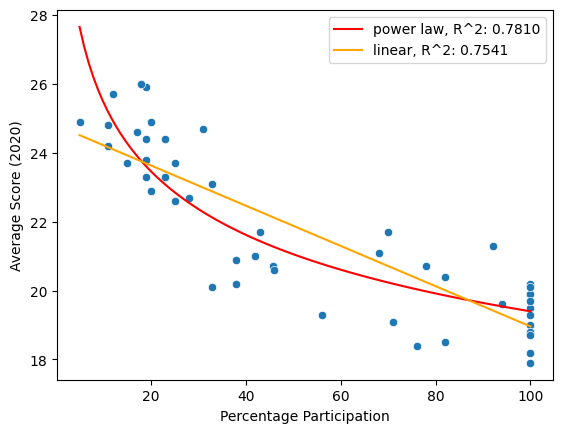

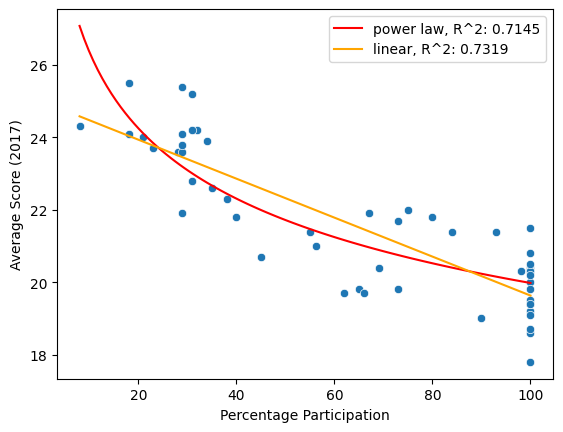

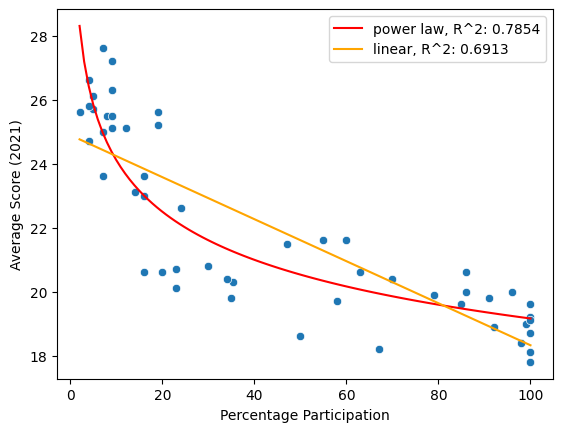

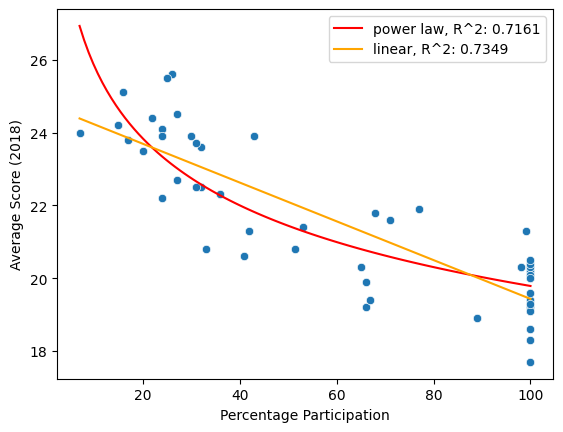

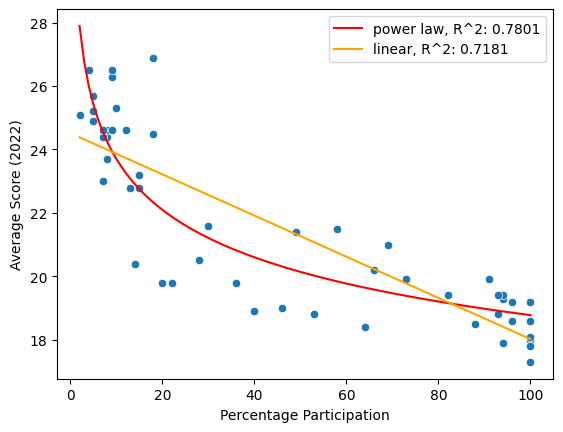

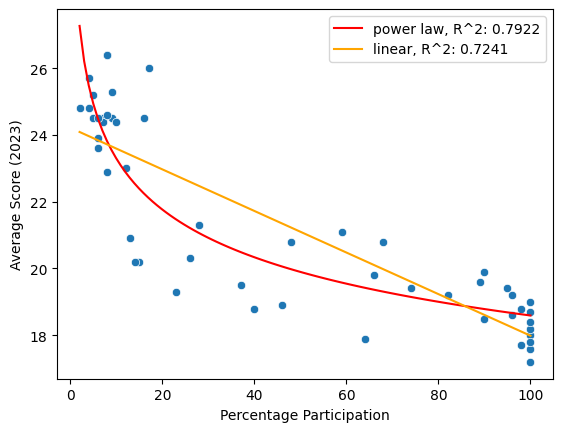

In [12]:
anomaly.anomaly(act_scores_df, separate_years=True)